# Support Vector Machine (SVM)

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Load the data
df = pd.read_csv("data-diabetes.csv")

In [3]:
# Show the first several data samples
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4.0,117.0,64.0,27.0,120.0,33.2,0.230,24.0,0.0
1,2.0,91.0,62.0,0.0,0.0,27.3,0.525,22.0,0.0
2,5.0,101.0,68.0,47.0,71.0,30.2,0.364,24.0,0.0
3,2.0,99.0,52.0,15.0,94.0,24.6,0.637,21.0,0.0
4,2.0,130.0,74.0,55.0,100.0,33.6,0.404,23.0,0.0


This is a dataset used to predict whether a patient has diabetes depending on the following features:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm). Skin thickening is frequently observed in patients with diabetes. Affected areas of skin can appear thickened.
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function, indicating the function which scores likelihood of diabetes based on family history.
* Age: Age (years)
* Outcome: Class variable (0: negative or 1: positive)


In [4]:
# Show data information
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2666 non-null   float64
 1   Glucose                   2661 non-null   float64
 2   BloodPressure             2666 non-null   float64
 3   SkinThickness             2666 non-null   float64
 4   Insulin                   2666 non-null   float64
 5   BMI                       2655 non-null   float64
 6   DiabetesPedigreeFunction  2666 non-null   float64
 7   Age                       2666 non-null   float64
 8   Outcome                   2666 non-null   float64
dtypes: float64(9)
memory usage: 187.6 KB


(2666, 9)

In [5]:
# Drop duplicate samples
df = df.drop_duplicates(ignore_index=True)     # ignore_index=True means the resulting axis will be labeled 0, 1, ..., n-1, otherwise there will be index gaps. Try df = df.drop_duplicates(), then df.head(1000) to see the difference.
df.shape

# The data flow is: (1) Remove outliers, (2) split train/test, then (3) process data (process the test data exactly the same way the train data is processed)
# If removing outliers is conducted after train/test split, an outlier in train set may not be an outlier in combined/full set, also the model will have high variance.
# If processing data is conducted before train/test split (mean replacement, etc.), it causes data leakage.

(2191, 9)

## Understanding box plot and outliers detection

![Box plot 1](boxplot-intro1.png "Box plot 1")

![Box plot 2](boxplot-intro2.png "Box plot 2")

A box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. Some important components of a box plot are:
- Lower Quartile (Q1): at 25th percentile of the data.
- Upper Quartile (Q3): at 75th percentile of the data.
- Whiskers: a popular choice for the boundaries of the whiskers is based on the 1.5 IQR value. 
  - Upper whisker: from above the upper quartile (Q3), a distance of 1.5 times the IQR is measured out and a whisker is drawn up to the largest observed data point from the dataset that falls within this distance.
  - Lower whisker: from above the lower quartile (Q1) a distance of 1.5 times the IQR is measured out below the lower quartile (Q1) and a whisker is drawn down to the lowest observed data point from the dataset that falls within this distance.

Because the whiskers must end at an observed data point, the whisker lengths can look unequal, even though 1.5 IQR is the same for both sides. All other observed data points outside the boundary of the whiskers are plotted as outliers.

However, the whiskers can stand for several other things, such as:
- The minimum and the maximum value of the data set.
- One standard deviation above and below the mean of the data.
- The 9th percentile and the 91st percentile of the data.
- The 2nd percentile and the 98th percentile of the data.


<AxesSubplot:>

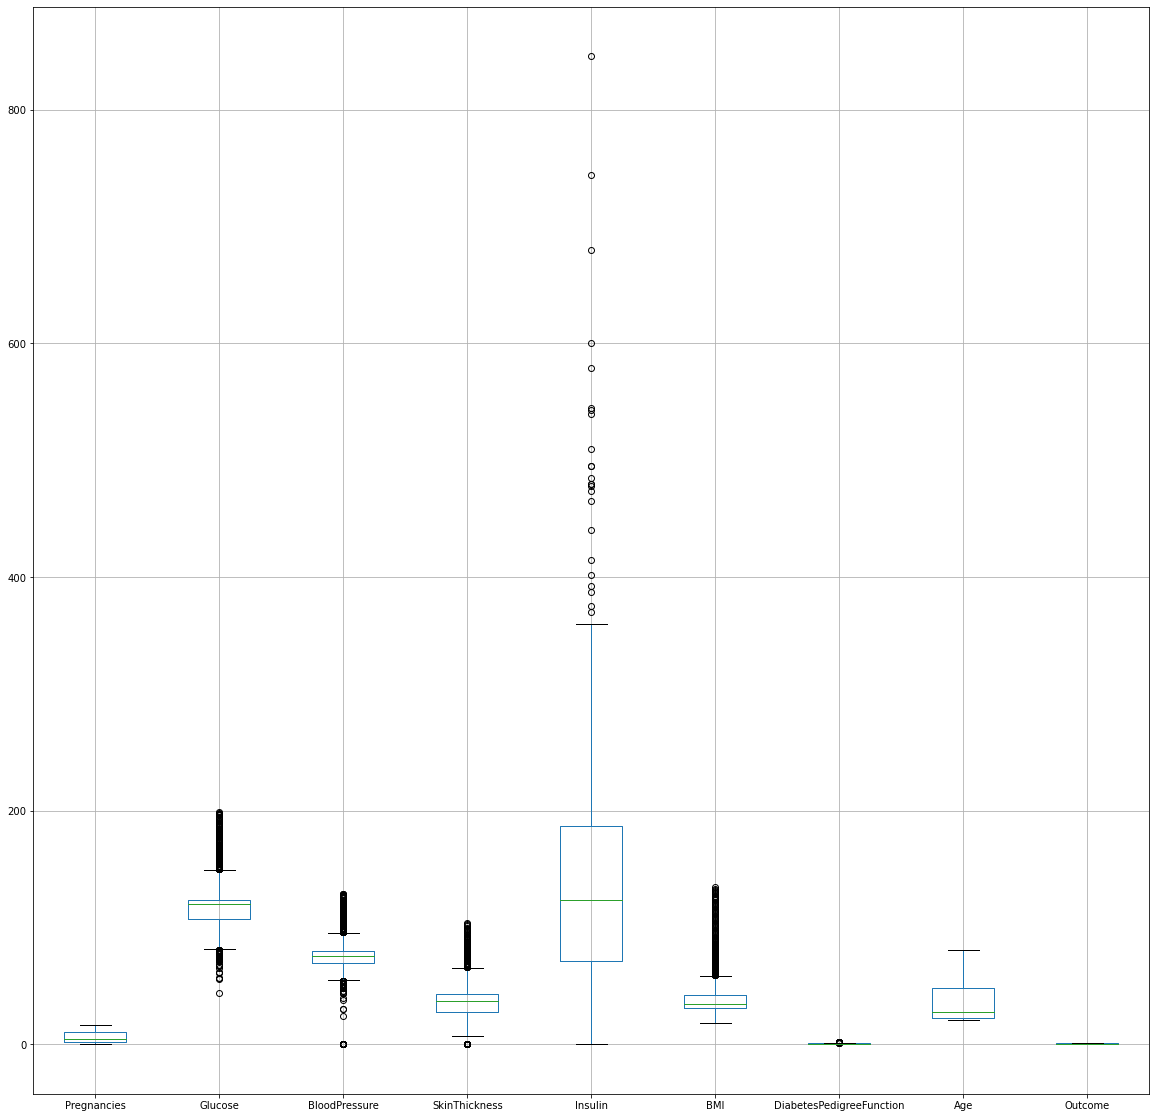

In [19]:
df.boxplot(figsize=(20,20))

In [6]:
# Let us take the whisker as :The 2nd percentile and the 98th percentile of the data" to remove data outliers.

# Remove outliers of 'Pregnancies' feature
q = df['Pregnancies'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['Pregnancies'] < q]

# Remove outliers of 'Glucose' feature
q = df['Glucose'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['Glucose'] < q]

# Remove outliers of 'BloodPressure' feature
q = df['BloodPressure'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['BloodPressure'] < q]

# Remove outliers of 'SkinThickness' feature
q = df['SkinThickness'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['SkinThickness'] < q]

# Remove outliers of 'Insulin' feature
q = df['Insulin'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['Insulin'] < q]

# Remove outliers of 'BMI' feature
q = df['BMI'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['BMI'] < q]

# Remove outliers of 'DiabetesPedigreeFunction' feature
q = df['DiabetesPedigreeFunction'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['DiabetesPedigreeFunction'] < q]

# Remove outliers of 'Age' feature
q = df['Age'].quantile(0.98)  # Select q range as 98%
df_clean = df[df['Age'] < q]

df_clean.shape

(2144, 9)

In [7]:
# Separate data features by removing the data label.
X = df_clean.drop(columns=["Outcome"], axis=1)

# Assign data label to variable y
y = df_clean.Outcome

# Split train/test with a random state
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, train_size=0.8)

In [8]:
# Show some training samples
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1975,0.0,97.0,64.0,36.0,100.0,36.8,0.600,25.0
1290,1.0,97.0,68.0,21.0,0.0,27.2,1.095,22.0
4,2.0,130.0,74.0,55.0,100.0,33.6,0.404,23.0
903,11.0,120.0,80.0,37.0,220.0,85.3,0.785,48.0
1655,12.0,106.0,80.0,0.0,0.0,23.6,0.137,44.0


In [9]:
# Check nan values in the data, there are some at the columns ["Glucose", "BMI"]
df_clean[df_clean.isna().any(axis=1)]

# There are zero values in the data at the columns ["BloodPressure", "SkinThickness", "Insulin"]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
36,8.0,125.0,96.0,0.0,0.0,NaN,0.232,54.0,1.0
335,7.0,105.0,0.0,0.0,0.0,NaN,0.305,24.0,0.0
546,2.0,74.0,0.0,0.0,0.0,NaN,0.102,22.0,0.0
722,2.0,84.0,0.0,0.0,0.0,NaN,0.304,21.0,0.0
851,6.0,NaN,68.0,41.0,0.0,39.0,0.727,41.0,1.0
928,1.0,NaN,74.0,20.0,23.0,27.7,0.299,21.0,0.0
965,10.0,115.0,0.0,0.0,0.0,NaN,0.261,30.0,1.0
1014,0.0,102.0,75.0,23.0,0.0,NaN,0.572,21.0,0.0
1197,6.0,114.0,0.0,0.0,0.0,NaN,0.189,26.0,0.0
1484,0.0,94.0,0.0,0.0,0.0,NaN,0.256,25.0,0.0


In [10]:
# Load SimpleImputer for completing missing values with simple strategies.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# Fill in zero values in trainng and test set with mean value of the training set.
imputer = SimpleImputer(missing_values=0, strategy="mean")
zero_cols = ["BloodPressure", "SkinThickness", "Insulin"]     # It is ok to have zero times pregnancy, so do not need ot fill in zero 'Pregnancies'.
X_train.loc[:, zero_cols] = imputer.fit_transform(X_train[zero_cols])
X_test.loc[:, zero_cols] = imputer.transform(X_test[zero_cols])

# # Fill in nan values in trainng and test set with mean value of the training set.
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
nan_cols = ["Glucose", "BMI"]     # Glucose and BMI have nan values
X_train.loc[:, nan_cols] = imputer.fit_transform(X_train[nan_cols])
X_test.loc[:, nan_cols] = imputer.transform(X_test[nan_cols])

# Note: SimpleImputer also provides other options for filling in missing value strategy, such as median, most_frequent, constant.

In [11]:
# Initialize and use StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized_train = scaler.fit_transform(X_train)     # Fit and transform thr training data
X_normalized_test = scaler.transform(X_test)           # Only transform the test data.

In [12]:
# SVC is C-Support Vector Classification and its implementation is based on libsvm. The multiclass support is handled according to a one-vs-one scheme.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
model = SVC()
model.fit(X_normalized_train, y_train)

SVC()

In [13]:
# Show evaluation metrics on the test set
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       241
         1.0       0.90      0.90      0.90       188

    accuracy                           0.91       429
   macro avg       0.91      0.91      0.91       429
weighted avg       0.91      0.91      0.91       429



#Model tuning

In [14]:
#Chọn các parameters để tiến hành fine-tune (default values của SVM là C=1, gamma=scale, kernel=rbf)
from sklearn.model_selection import GridSearchCV

### Hyper-parameter C is for soft margin SVM. 
# For a large value C, the optimization will chose smaller-margin hyperplane so that there are no misclassified samples in the training data.
# For a small value C, the optimization will chose larger-margin hyperplane even if there are misclassified samples in the training data.

### Hyper-parameter gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000],
              "gamma": ["scale", 0.001, 0.005, 0.1]}
gridsearch = GridSearchCV(SVC(), param_grid, cv=10, scoring="f1", verbose=1)     # cv: number of folds in cross validation.

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Visualization of gamma's impact

![Gamma01](gamma01.png "gamma=0.1")
![Gamma1](gamma1.png "gamma=1")
![Gamma10](gamma10.png "gamma=10")
![Gamma100](gamma100.png "gamma=100")

In [15]:
# Run grid search to find the best set of hyper-parameters
gridsearch.fit(X_normalized_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 0.001, 0.005, 0.1]},
             scoring='f1', verbose=1)

In [16]:
#in ra param đc cho là tố nhất
gridsearch.best_params_

{'C': 1000, 'gamma': 0.005}

In [17]:
# Re-run SVM with the best set of hyper-parameters.
model = SVC(C=gridsearch.best_params_['C'], gamma=gridsearch.best_params_['gamma'])
model.fit(X_normalized_train, y_train)

SVC(C=1000, gamma=0.005)

In [18]:
# Show evaluation metrics on the test set
print(classification_report(y_test, model.predict(X_normalized_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       241
         1.0       0.91      0.89      0.90       188

    accuracy                           0.91       429
   macro avg       0.91      0.91      0.91       429
weighted avg       0.91      0.91      0.91       429

